In [19]:
import os
import cv2
from skimage import io, color
import numpy as np 
import matplotlib.pyplot as plt 
import keras
from keras.layers import Conv2D, Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import warnings
warnings.filterwarnings('ignore')


In [52]:
data_path = "C:/Users/vinma/OneDrive/Desktop/INTERSHIP/Prodigy-Infotech/Task-4/leapGestRecog"

dir = [data for data in os.listdir(data_path) if os.path.isdir(os.path.join(data_path,data))]

print(dir)

data_00_dir= []

for data in dir :
    data_folder= os.path.join(data_path,data)
    data_00_folder = [ da for da in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder,da))]
    data_00_dir.extend(data_00_folder)

print(data_00_dir[:10])

Categories= data_00_dir[:10]


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'leapGestRecog']
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [107]:
image_data = []

for data_folder in dir:
    for category in Categories:
        img_index = Categories.index(category)
        path = os.path.join(data_path, data_folder, category)
       
        # print("Checking path:", path)
        if os.path.exists(path):
            try:
                for img in os.listdir(path):
                    img_path = os.path.join(path, img)
                    image = io.imread(img_path, as_gray=True)
                    image = cv2.resize(image, (50, 50))
                    image_data.append([image, img_index])
            except Exception as e:
                # print(f"Error processing images in {path}: {e}")
                pass
        else:
            # print(f"Directory not found: {path}")
            pass


In [108]:
import random
random.shuffle(image_data)
input_data = []
label = []
for X in image_data:
    input_data.append(X)

for Y in image_data:
    label.append(Y)

In [109]:
image_data[:10]

[[array([[4, 4, 5, ..., 3, 4, 4],
         [4, 5, 5, ..., 4, 3, 4],
         [5, 4, 4, ..., 2, 3, 4],
         ...,
         [6, 4, 5, ..., 4, 4, 4],
         [4, 5, 4, ..., 4, 3, 3],
         [5, 5, 5, ..., 4, 4, 5]], dtype=uint8),
  6],
 [array([[4, 4, 5, ..., 3, 4, 4],
         [4, 5, 5, ..., 4, 4, 3],
         [5, 5, 5, ..., 3, 4, 3],
         ...,
         [5, 6, 5, ..., 4, 4, 5],
         [5, 4, 4, ..., 3, 5, 4],
         [6, 5, 5, ..., 3, 4, 5]], dtype=uint8),
  8],
 [array([[5, 7, 6, ..., 7, 7, 5],
         [6, 6, 6, ..., 6, 6, 6],
         [7, 6, 7, ..., 6, 6, 5],
         ...,
         [6, 5, 5, ..., 6, 5, 5],
         [5, 5, 6, ..., 6, 5, 5],
         [3, 5, 5, ..., 5, 5, 5]], dtype=uint8),
  4],
 [array([[5, 4, 5, ..., 4, 4, 4],
         [5, 5, 5, ..., 5, 4, 3],
         [4, 5, 6, ..., 4, 4, 4],
         ...,
         [4, 4, 4, ..., 5, 4, 4],
         [4, 5, 5, ..., 4, 5, 4],
         [5, 5, 5, ..., 4, 5, 4]], dtype=uint8),
  6],
 [array([[ 4,  5,  5, ...,  4,  4,  5],
    

In [110]:
label[:10]

[[array([[4, 4, 5, ..., 3, 4, 4],
         [4, 5, 5, ..., 4, 3, 4],
         [5, 4, 4, ..., 2, 3, 4],
         ...,
         [6, 4, 5, ..., 4, 4, 4],
         [4, 5, 4, ..., 4, 3, 3],
         [5, 5, 5, ..., 4, 4, 5]], dtype=uint8),
  6],
 [array([[4, 4, 5, ..., 3, 4, 4],
         [4, 5, 5, ..., 4, 4, 3],
         [5, 5, 5, ..., 3, 4, 3],
         ...,
         [5, 6, 5, ..., 4, 4, 5],
         [5, 4, 4, ..., 3, 5, 4],
         [6, 5, 5, ..., 3, 4, 5]], dtype=uint8),
  8],
 [array([[5, 7, 6, ..., 7, 7, 5],
         [6, 6, 6, ..., 6, 6, 6],
         [7, 6, 7, ..., 6, 6, 5],
         ...,
         [6, 5, 5, ..., 6, 5, 5],
         [5, 5, 6, ..., 6, 5, 5],
         [3, 5, 5, ..., 5, 5, 5]], dtype=uint8),
  4],
 [array([[5, 4, 5, ..., 4, 4, 4],
         [5, 5, 5, ..., 5, 4, 3],
         [4, 5, 6, ..., 4, 4, 4],
         ...,
         [4, 4, 4, ..., 5, 4, 4],
         [4, 5, 5, ..., 4, 5, 4],
         [5, 5, 5, ..., 4, 5, 4]], dtype=uint8),
  6],
 [array([[ 4,  5,  5, ...,  4,  4,  5],
    

(50, 50)
8 <class 'int'>
(50, 50)
4 <class 'int'>
(50, 50)
6 <class 'int'>
(50, 50)
2 <class 'int'>
(50, 50)
3 <class 'int'>
(50, 50)
3 <class 'int'>
(50, 50)
6 <class 'int'>
(50, 50)
9 <class 'int'>
(50, 50)
5 <class 'int'>


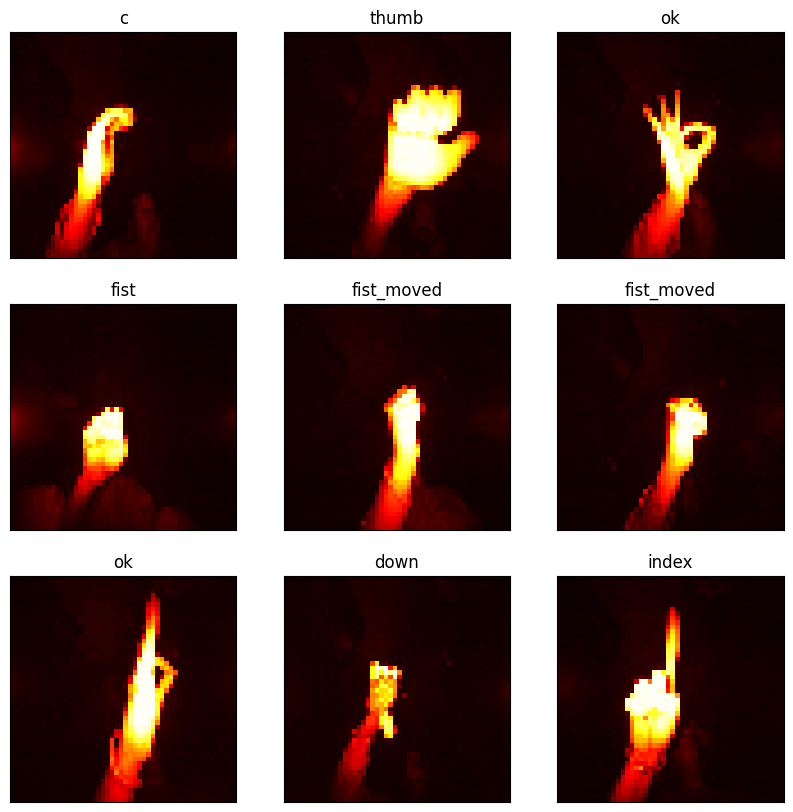

In [113]:

plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)

    img_array = image_data[i][0]
    print(img_array.shape)  

    if len(img_array.shape) == 2:
        plt.imshow(img_array, cmap='hot')
        plt.xticks([])
        plt.yticks([])

        index = image_data[i][1]

        plt.title(Categories[index][3:])
        print(index, type(index))
    else:
        print(f"Skipping subplot {i} due to invalid image shape: {img_array.shape}")

plt.show()


In [116]:
input_data = np.array([item[0] for item in input_data])  
label = np.array([item[1] for item in label]) 

input_data = input_data / 250.0

print(input_data.shape)
print(label.shape)


(20000, 50, 50)
(20000,)


In [117]:
label = keras.utils.to_categorical(label,num_classes= 10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(input_data,label,random_state=1580,test_size=0.3,stratify=label)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(50, 50, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [125]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

model.fit(X_train, Y_train, epochs = 7, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/7
438/438 [==============================] - 60s 137ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9997
Epoch 2/7
438/438 [==============================] - 57s 129ms/step - loss: 4.1735e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 3/7
438/438 [==============================] - 74s 169ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 4/7
438/438 [==============================] - 62s 141ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0162 - val_accuracy: 0.9970
Epoch 5/7
438/438 [==============================] - 73s 168ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0049 - val_accuracy: 0.9995
Epoch 6/7
438/438 [==============================] - 59s 136ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9995
Epoch 7/7
438/438 [==============================] - 56s 128ms/step - loss: 6.2474e-04 - accuracy: 0.9999 - val_loss: 0.0080 - val_

In [126]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_2 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_3 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                      

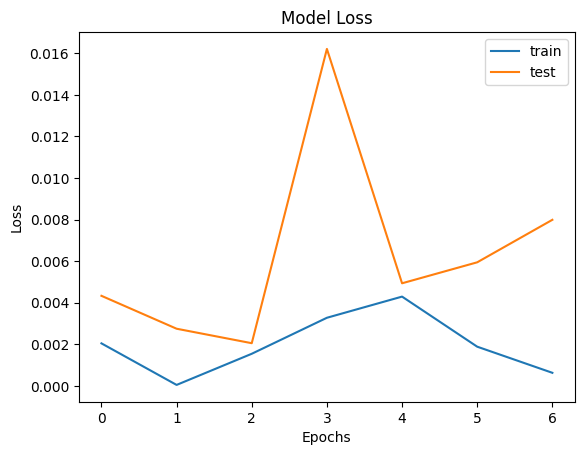

In [127]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

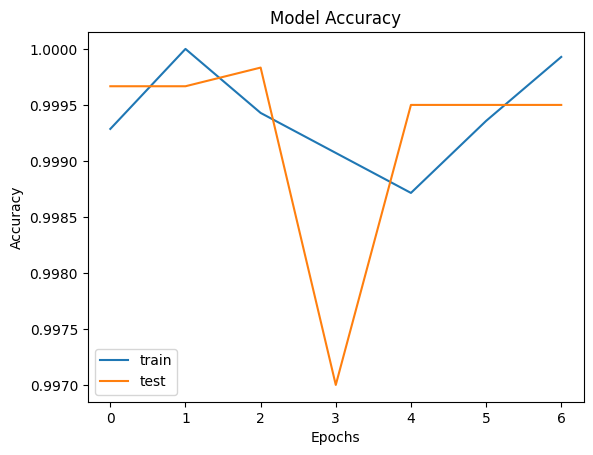

In [128]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [129]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 5s 28ms/step - loss: 0.0080 - accuracy: 0.9995
Test accuracy: 99.95%


188/188 [==============================] - 5s 29ms/step


[]

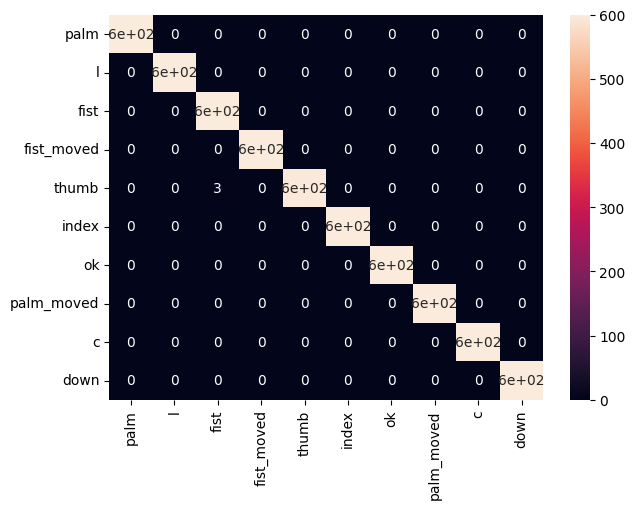

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
map = [c[3:] for c in Categories]
plt.figure(figsize=(7,5))
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=map, yticklabels=map)
plt.plot()